> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

In [23]:
import json
import requests
import matplotlib.pyplot as plt
from skimage import io
import sys

# Define o rover usado nas Q4/Q5
ROVER_NAME = 'curiosity' 

# Q1. Carregamento da Chave
try:
    with open('key.json', 'r') as f:
        config = json.load(f)
        API_KEY = config.get('API_KEY')
        if not API_KEY:
            raise ValueError("Chave API não encontrada.")
except Exception as e:
    print(f"Erro na Q1: {e}")
    sys.exit(1)


#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Copyright: Pascal Fouquet
Explanation:
On the morning of September 24 a rocket crosses the bright solar disk in this long range telescopic snapshot captured from Orlando, Florida. That's about 50 miles north of its Kennedy Space Center launch site. This rocket carried three new space weather missions to space. Signals have now been successfully acquired from all three - NASA's Interstellar Mapping and Acceleration Probe, NASA’s Carruthers Geocorona Observatory, and the National Oceanic and Atmospheric Administration (NOAA) Space Weather Follow-On Lagrange 1 (SWFO-L1) - as they begin their journey to L1, an Earth-Sun lagrange point. L1 is about 1.5 million kilometers in the sunward direction from planet Earth. Appropriately, major space weather influencers, aka dark sunspots in active regions across the Sun, are posing with the transiting rocket. In fact, large active region AR4225 is just right of the rocket's nose.



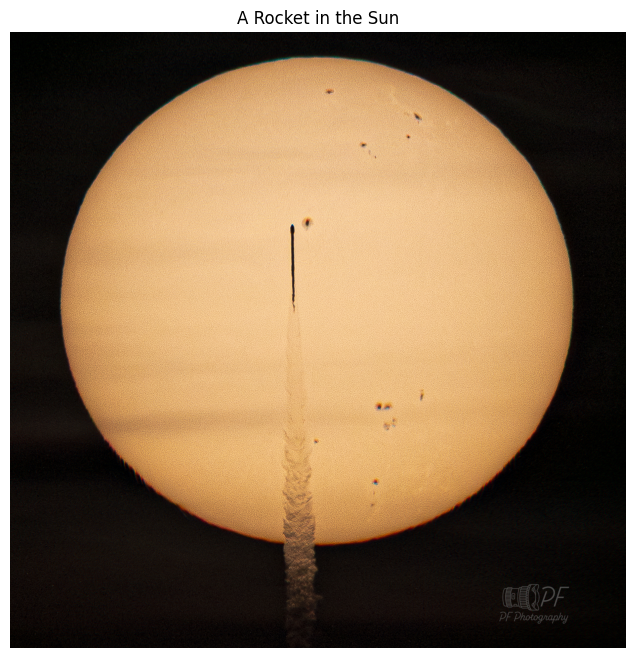

In [27]:
APOD_URL = 'https://api.nasa.gov/planetary/apod'
params_apod = {'api_key': API_KEY}

try:
    response_apod = requests.get(APOD_URL, params=params_apod)
    response_apod.raise_for_status()
    data_apod = response_apod.json()
    
    # Imprimir copyright e explanation
    print(f"Copyright: {data_apod.get('copyright', 'N/A')}")
    print(f"Explanation:\n{data_apod.get('explanation', 'N/A')}\n")
    
    # Apresentar a imagem
    image_url = data_apod.get('hdurl') or data_apod.get('url')
    if image_url:
        img = io.imread(image_url)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(data_apod.get('title', 'APOD Image'))
        plt.axis('off')
    
except requests.exceptions.RequestException as e:
    print(f"Erro: {e}")



#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [26]:
if 'response_apod' in locals() and response_apod.ok:
    print("Limites de Requisição:")
    # Imprimir os atributos do header
    print(f"X-RateLimit-Limit: {response_apod.headers.get('X-RateLimit-Limit', 'N/A')}")
    print(f"X-RateLimit-Remaining: {response_apod.headers.get('X-RateLimit-Remaining', 'N/A')}")
else:
    print("Não foi possível consultar os limites, a requisição falhou.")


Limites de Requisição:
X-RateLimit-Limit: 4000
X-RateLimit-Remaining: 3991


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [36]:
MANIFEST_URL = f'https://api.nasa.gov/mars-photos/api/v1/manifests/{ROVER_NAME}'
params_manifest = {'api_key': API_KEY}

try:
    response_manifest = requests.get(MANIFEST_URL, params=params_manifest)
    response_manifest.raise_for_status()
    data_manifest = response_manifest.json()
    
    manifest = data_manifest.get('photo_manifest', {})
    
    max_sol = manifest.get('max_sol')
    max_date = manifest.get('max_date')
    
    # Imprimir max_sol e max_date
    print(f"\nManifest do Rover {ROVER_NAME.capitalize()}:")
    print(f"max_sol: {max_sol}")
    print(f"max_date: {max_date}")
    
    # *** CORREÇÃO: Usando SOL 1000 para garantir que haja fotos para a Q5 ***
    target_sol = 1000 
    
except requests.exceptions.RequestException as e:
    print(f"Erro: {e}")
    sys.exit(1)





Manifest do Rover Curiosity:
max_sol: 4671
max_date: 2025-09-26


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```




Iniciando Q5 (SOL: 1000)...
Processando Página 1 (25 fotos recebidas).
Busca finalizada. Total de 4 imagens plotadas.


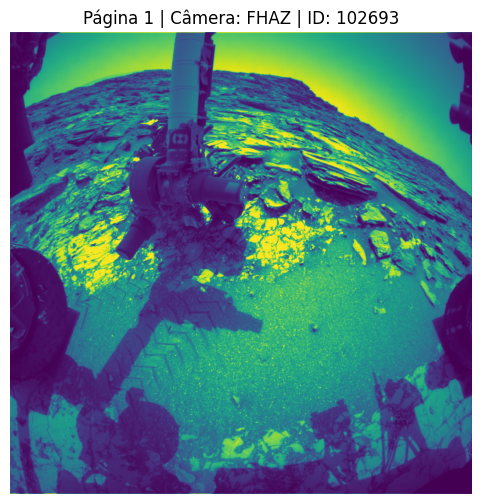

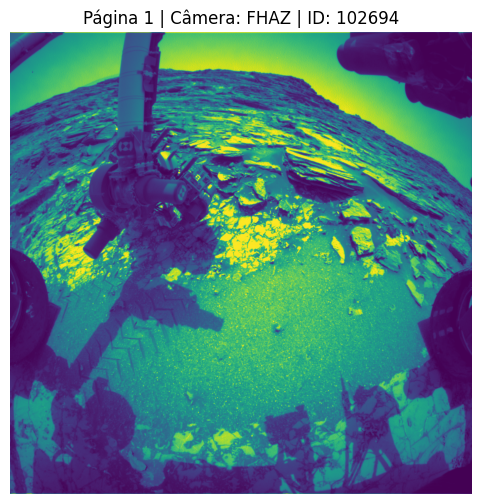

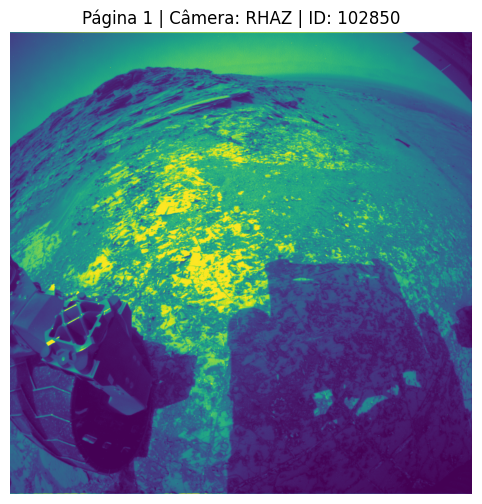

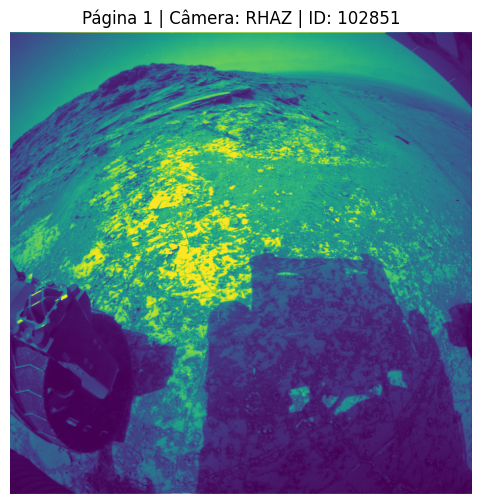

In [38]:
TARGET_CAMERAS = ['NAVCAM', 'FHAZ', 'RHAZ']
PHOTOS_URL = f'https://api.nasa.gov/mars-photos/api/v1/rovers/{ROVER_NAME}/photos'

page = 1
total_images_plotted = 0

print(f"\nIniciando Q5 (SOL: {target_sol})...")

# Paginação até resposta ser None (sem fotos)
while True:
    params_photos = {
        'api_key': API_KEY,
        'sol': target_sol,
        'page': page
    }
    
    try:
        response_photos = requests.get(PHOTOS_URL, params=params_photos)
        response_photos.raise_for_status()
        photos = response_photos.json().get('photos')
        
        if not photos:
            print(f"Fim da paginação na página {page}.")
            break
            
        print(f"Processando Página {page} ({len(photos)} fotos recebidas).")
        
        # Filtrar as fotos pelas câmeras
        filtered_photos = [p for p in photos if p['camera']['name'] in TARGET_CAMERAS]
        
        # Plotagem (LIMITADO A 5 FOTO PARA SER RÁPIDO E SEGURO)
        for i, photo in enumerate(filtered_photos):
            if i >= 5: break

            image_url = photo['img_src']
            camera_name = photo['camera']['name']
            photo_id = photo['id']
            
            try:
                img = io.imread(image_url)
                
                plt.figure(figsize=(8, 6))
                plt.imshow(img)
                
                # Título conforme solicitado
                title = f"Página {page} | Câmera: {camera_name} | ID: {photo_id}"
                plt.title(title)
                plt.axis('off')
                total_images_plotted += 1
                
            except Exception:
                pass 
                
        page += 1
        
        # Parada rápida após a primeira página (MANTIDO)
        if page > 1: break 

    except requests.exceptions.RequestException:
        break

print(f"Busca finalizada. Total de {total_images_plotted} imagens plotadas.")
plt.show()

